<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W8D4_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 18.0MB/s]


In [3]:
!unzip heart-disease-data.zip

Archive:  heart-disease-data.zip
  inflating: heart_disease_uci.csv   


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data_heart = pd.read_csv('heart_disease_uci.csv')
data_heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


*Column Descriptions:*

**id** (Unique id for each patient)

**age** (Age of the patient in years)

**origin** (place of study)

**sex** (Male/Female)

**cp** chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)

**trestbps** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

**chol** (serum cholesterol in mg/dl)

**fbs** (if fasting blood sugar > 120 mg/dl)

**restecg** (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]

**thalach**: maximum heart rate achieved

**exang**: exercise-induced angina (True/ False)

**oldpeak**: ST depression induced by exercise relative to rest

**slope**: the slope of the peak exercise ST segment

**ca**: number of major vessels (0-3) colored by fluoroscopy

**thal**: [normal; fixed defect; reversible defect]

**num**: the predicted attribute

In [5]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
data_heart.drop_duplicates(inplace=True)

In [7]:
data_heart.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
print(data_heart['age'].unique())

[63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75]


In [9]:
print(data_heart['sex'].unique())

['Male' 'Female']


In [10]:
data_heart['sex'].replace('Male', 0, inplace=True)
data_heart['sex'].replace('Female', 1, inplace=True)
print(data_heart['sex'].unique())

[0 1]


In [11]:
print(data_heart['dataset'].unique())

['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


In [12]:
print(data_heart['cp'].unique())

['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']


In [13]:
data_heart['cp'].replace('typical angina', 0, inplace=True)
data_heart['cp'].replace('atypical angina', 1, inplace=True)
data_heart['cp'].replace('non-anginal', 2, inplace=True)
data_heart['cp'].replace('asymptomatic', 3, inplace=True)
print(data_heart['cp'].unique())

[0 3 2 1]


In [14]:
print(data_heart['trestbps'].unique())

[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185. 116.   0.  96. 127.]


In [15]:
print(data_heart['chol'].unique())

[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 293. 277. 214.
 207. 223. 160. 394. 184. 315. 409. 244. 195. 196. 126. 313. 259. 200.
 262. 215. 228. 193. 271. 210. 327. 149. 295. 306. 178. 237. 218. 242.
 319. 166. 180. 311. 278. 342. 169. 187. 157. 176. 241. 131. 132.  nan
 161. 173. 194. 297. 292. 339. 147. 291. 358. 412. 238. 163. 280. 202.
 328. 129. 190. 179. 272. 100. 468. 320. 312. 171. 365. 344.  85. 347.
 251. 287. 156. 117. 466. 338. 529. 392. 329. 355. 603. 404. 518. 285.
 279. 

In [16]:
print(data_heart['fbs'].unique())

[True False nan]


In [17]:
data_heart['fbs'].replace(False, 0, inplace=True)
data_heart['fbs'].replace(True, 1, inplace=True)
print(data_heart['fbs'].unique())

[ 1.  0. nan]


In [18]:
print(data_heart['restecg'].unique())

['lv hypertrophy' 'normal' 'st-t abnormality' nan]


In [19]:
data_heart['restecg'].replace('lv hypertrophy', 0, inplace=True)
data_heart['restecg'].replace('normal', 1, inplace=True)
data_heart['restecg'].replace('st-t abnormality', 2, inplace=True)
print(data_heart['restecg'].unique())

[ 0.  1.  2. nan]


In [20]:
print(data_heart['thalch'].unique())

[150. 108. 129. 187. 172. 178. 160. 163. 147. 155. 148. 153. 142. 173.
 162. 174. 168. 139. 171. 144. 132. 158. 114. 151. 161. 179. 120. 112.
 137. 157. 169. 165. 123. 128. 152. 140. 188. 109. 125. 131. 170. 113.
  99. 177. 141. 180. 111. 143. 182. 156. 115. 149. 145. 146. 175. 186.
 185. 159. 130. 190. 136.  97. 127. 154. 133. 126. 202. 103. 166. 164.
 184. 124. 122.  96. 138.  88. 105. 194. 195. 106. 167.  95. 192. 117.
 121. 116.  71. 118. 181. 134.  90.  98. 176. 135. 110.  nan 100.  87.
 102.  92.  91.  82. 119.  94. 104.  60.  83.  63.  70.  77.  72.  78.
  86.  93.  67.  84.  80. 107.  69.  73.]


In [21]:
print(data_heart['exang'].unique())

[False True nan]


In [22]:
data_heart['exang'].replace(False, 0, inplace=True)
data_heart['exang'].replace(True, 1, inplace=True)
print(data_heart['exang'].unique())

[ 0.  1. nan]


In [23]:
print(data_heart['oldpeak'].unique())

[ 2.3  1.5  2.6  3.5  1.4  0.8  3.6  0.6  3.1  0.4  1.3  0.   0.5  1.6
  1.   1.2  0.2  1.8  3.2  2.4  2.   2.5  2.2  2.8  3.   3.4  6.2  4.
  5.6  2.9  0.1  2.1  1.9  4.2  0.9  1.1  3.8  0.7  0.3  4.4  5.   nan
 -1.1 -1.5 -0.1 -2.6 -0.7 -2.  -1.   1.7 -0.8 -0.5 -0.9  3.7]


In [24]:
print(data_heart['slope'].unique())

['downsloping' 'flat' 'upsloping' nan]


In [25]:
data_heart['slope'].replace('downsloping', 0, inplace=True)
data_heart['slope'].replace('flat', 1, inplace=True)
data_heart['slope'].replace('upsloping', 2, inplace=True)
print(data_heart['slope'].unique())

[ 0.  1.  2. nan]


In [26]:
print(data_heart['ca'].unique())

[ 0.  3.  2.  1. nan]


In [27]:
print(data_heart['thal'].unique())

['fixed defect' 'normal' 'reversable defect' nan]


In [28]:
print(data_heart['num'].unique())

[0 2 1 3 4]


In [29]:
data_heart['trestbps'].replace(0, np.nan, inplace=True)

In [30]:
mean_by_sex_age = (data_heart.groupby(['age', 'sex'])['trestbps'].transform('mean')).round()
data_heart['trestbps'].fillna(mean_by_sex_age, inplace=True)

In [ ]:
print(data_heart['trestbps'].unique())

[145.         160.         120.         130.         140.
 172.         150.         110.         132.         117.
 135.         112.         105.         124.         125.
 142.         128.         170.         155.         104.
 180.         138.         108.         134.         122.
 115.         118.         100.         200.          94.
 165.         102.         152.         101.         126.
 174.         148.         178.         158.         192.
 129.         144.         123.         136.         146.
 106.         156.         154.         114.         164.
  98.         190.         125.75       113.          92.
  95.         124.66666667  80.         185.         138.14285714
 138.47619048 116.         147.5        123.52631579 130.23333333
 134.45454545 134.17979798 134.91666667 130.15151515 137.52173913
 135.96774194 141.06451613 131.4        132.15       139.57142857
  96.         124.90909091 127.92857143 146.66666667 138.94117647
 132.57142857 128.42857143 143. 

In [31]:
data_heart['chol'].replace(0, np.nan, inplace=True)
mean_by_sex_age = (data_heart.groupby(['age', 'sex'])['chol'].transform('mean')).round()
data_heart['chol'].fillna(mean_by_sex_age, inplace=True)
data_heart['chol'] = data_heart['chol'].fillna(data_heart['chol'].mean())

In [32]:
print(data_heart['chol'].isnull().sum())

0


In [33]:
data_heart['thalch'].replace(0, np.nan, inplace=True)
mean_by_sex_age = (data_heart.groupby(['age', 'sex'])['thalch'].transform('mean')).round()
data_heart['thalch'].fillna(mean_by_sex_age, inplace=True)

In [34]:
print(data_heart['thalch'].isnull().sum())

0


In [35]:
data_heart['oldpeak'].replace(0, np.nan, inplace=True)
mean_by_sex_age = (data_heart.groupby(['age', 'sex'])['oldpeak'].transform('mean')).round()
data_heart['oldpeak'].fillna(mean_by_sex_age, inplace=True)
data_heart['oldpeak'] = data_heart['oldpeak'].fillna(data_heart['oldpeak'].mean())

In [36]:
print(data_heart['oldpeak'].isnull().sum())

0


In [38]:
data_heart.drop('oldpeak', axis=1, inplace=True)

In [39]:
print(data_heart.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
slope       309
ca          611
thal        486
num           0
dtype: int64


In [40]:
data_heart_copy = data_heart.copy()
data_heart_copy.dropna(inplace=True)

In [41]:
data_heart_copy.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [42]:
categorical_cols = ['sex','dataset', 'cp', 'fbs', 'restecg', 'slope', 'exang', 'thal']

# Apply one-hot encoding
data_heart_copy = pd.get_dummies(data_heart_copy, columns=categorical_cols)

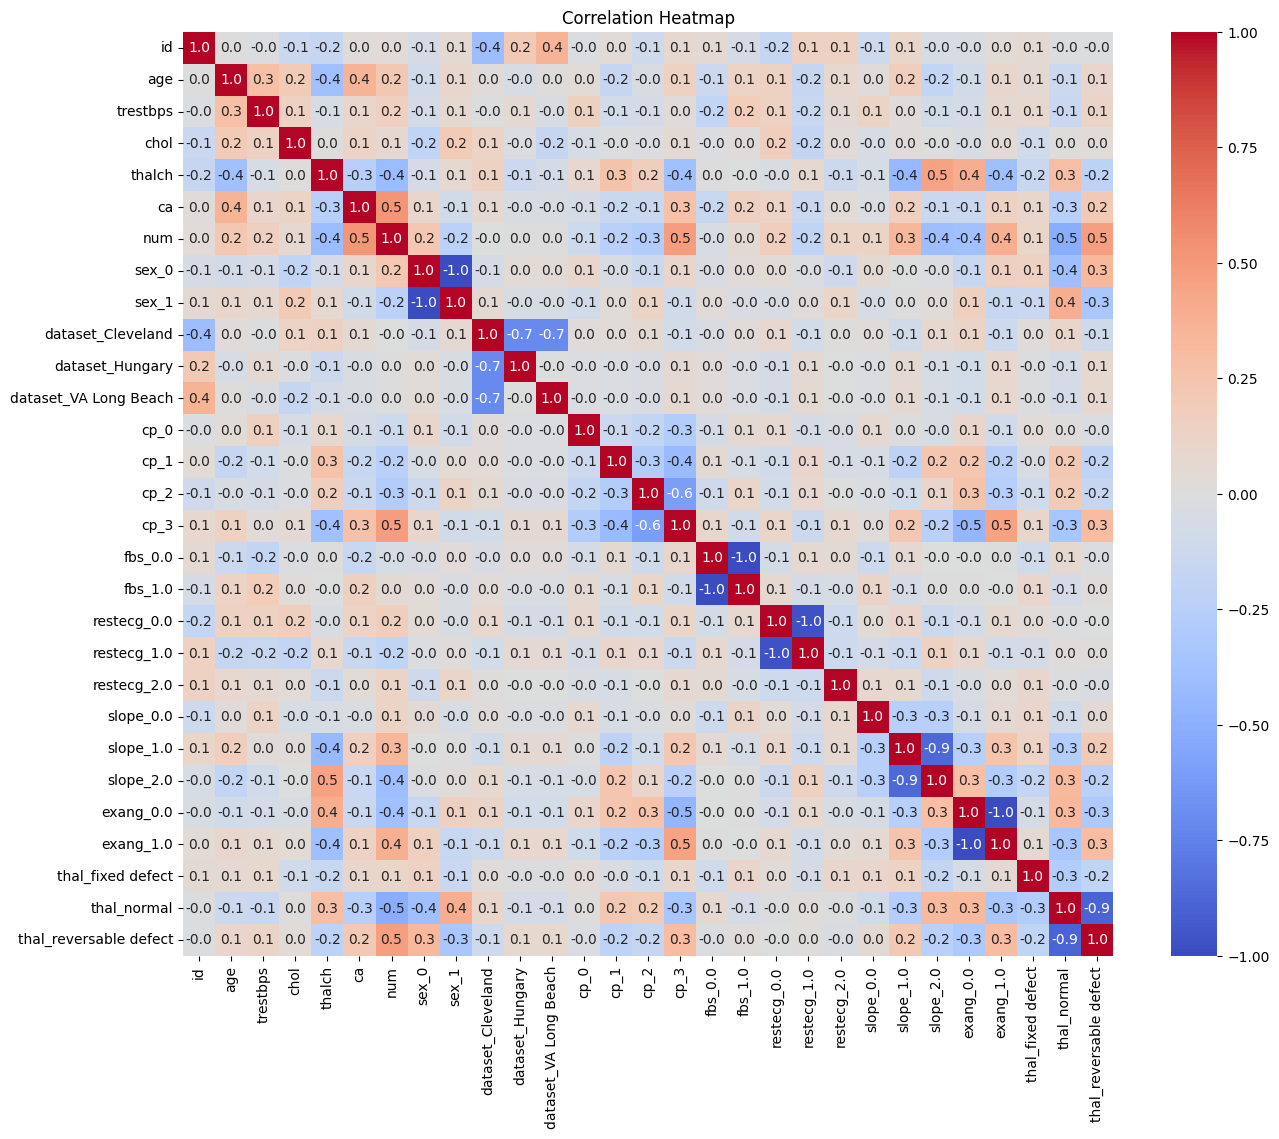

In [43]:
correlation_matrix = data_heart_copy.corr()
# print(correlation_matrix)

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
# Assuming df is your DataFrame containing the dataset

# Model Training
# Split the dataset into features (X) and target variable (y)
X = data_heart_copy.drop(columns=['num'])  # Features
y = data_heart_copy['num']  # Target variable

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
# Evaluate the model on the testing set using accuracy, precision, recall, and F1 score
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Use a confusion matrix to visualize the model’s performance
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.5777777777777777
Precision: 0.4728056823947234
Recall: 0.5777777777777777
F1 Score: 0.4838500831551437
Confusion Matrix:
[[48  0  0  1  0]
 [15  1  2  2  0]
 [ 3  1  2  2  0]
 [ 6  0  3  1  0]
 [ 1  1  1  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
